# Decision Trees 
**Adapted from Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron**

https://github.com/ageron/handson-ml

- **Decision Trees** ask a series of questions and perform a sequence of branching operations based on comparisons of some quantities.
- They can perform classification and regression tasks and even multioutput tasks (with more than two classes).
- They don’t require feature scaling or centering, only very little data preparation.

In [21]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

## Classification Trees

Train a Decision Tree classifier on the iris dataset:

In [39]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

iris = datasets.load_iris()
X = iris['data'][:, 2:]  # petal length and width
y = iris['target']

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Text(0.4, 0.8333333333333334, 'sepal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'sepal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

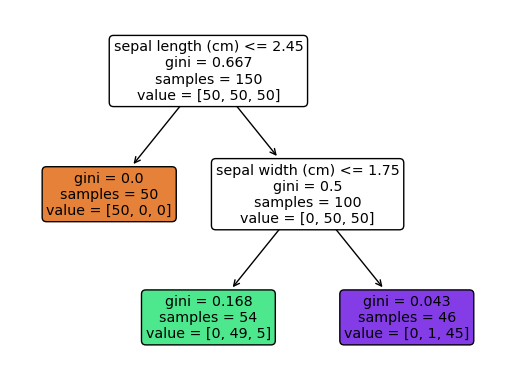

In [43]:
plot_tree(tree_clf, filled=True, max_depth = 5, feature_names=iris['feature_names'], rounded=2)

Use the model to obtain the probalibilty that a flower with 5 cm long and 1.5 cm wide petals belongs to a certain class:

In [41]:
tree_clf.predict_proba([[5, 1.5]])    #petals 5 cm long and 1.5 cm wide

array([[0.        , 0.90740741, 0.09259259]])

Prediction for 5 cm long and 1.5 cm wide petals: class 1 *Iris versicolor*:

In [42]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regression Trees

Decision Trees are also capable of performing regression tasks.
- It predicts a value in each node instead of a class. 
- The predicted value for each region is always the average target value of the instances in that region.

Generate a quadratic dataset:

In [44]:
# quadratic training set + noise
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

Text(0, 0.5, '$y$')

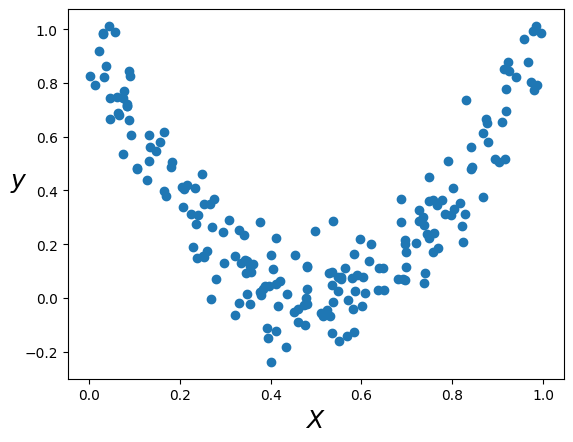

In [48]:
plt.scatter(X, y)
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=10)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=10)

[Text(0.49107142857142855, 0.9, 'x[0] <= 0.168\nsquared_error = 0.096\nsamples = 200\nvalue = 0.317'),
 Text(0.26785714285714285, 0.7, 'x[0] <= 0.092\nsquared_error = 0.027\nsamples = 34\nvalue = 0.708'),
 Text(0.14285714285714285, 0.5, 'x[0] <= 0.045\nsquared_error = 0.015\nsamples = 23\nvalue = 0.794'),
 Text(0.07142857142857142, 0.3, 'x[0] <= 0.018\nsquared_error = 0.006\nsamples = 8\nvalue = 0.901'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'x[0] <= 0.089\nsquared_error = 0.01\nsamples = 15\nvalue = 0.736'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.5, 'x[0] <= 0.166\nsquared_error = 0.005\nsamples = 11\nvalue = 0.53'),
 Text(0.35714285714285715, 0.3, 'x[0] <= 0.161\nsquared_error = 0.005\nsamples = 10\nvalue = 0.521'),
 Text(0.32142857142857145, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.1, '\n  (...)  \n'),
 Te

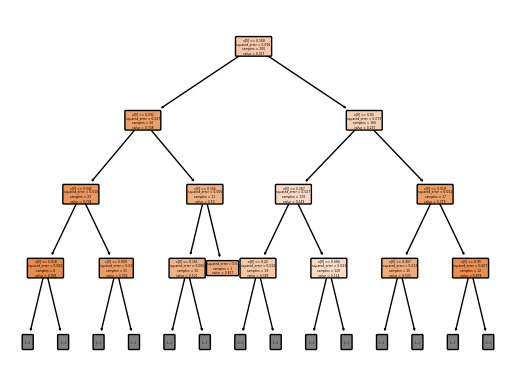

In [53]:
plot_tree(tree_reg, filled=True, max_depth = 3, rounded=2)

## Exercises

**1)** 

a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [56]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. Split it into a training set and a test set using `train_test_split()`.

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
tree_clf = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree_clf, param_grid, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [64]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=23, random_state=42)

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy. By default, `GridSearchCV` trains the best model found on the whole training set (you can change this by setting `refit=False`), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [33]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc * 100, '%')

Accuracy: 87.35000000000001 %


**2)** Grow a forest:

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [34]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

random_split_trees = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in random_split_trees.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [35]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.798909

c. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [36]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [37]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

/var/folders/4m/zbm6lc054ws9njhzxj0l6cghklxfht/T/ipykernel_28659/2539803968.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)


d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [38]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873